In [1]:
import rioxarray
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [13]:
# AOI_path = r"C:\Users\97254\Desktop\viirs_cupels\New WinRAR ZIP ארכיון (2)\clip16.shp"
AOI_path = r"C:\Users\97254\Desktop\viirs_cupels\2022-11-02_18-30\clip16.shp"

AOI = gpd.read_file(AOI_path)
# AOI = gpd.read_file(AOI_path)


In [3]:
# G16_path = r"C:\Users\97254\Desktop\viirs_cupels\New WinRAR ZIP ארכיון (2)\OR_ABI-L2-MCMIPC-M6_G16_s20230341926176_e20230341928555_c20230341929050.nc"
# G17_path = r"C:\Users\97254\Desktop\viirs_cupels\New WinRAR ZIP ארכיון (2)\OR_ABI-L2-MCMIPC-M6_G18_s20230341926178_e20230341928562_c20230341929046.nc"
# virs_image = r"C:\Users\97254\Desktop\viirs_cupels\New WinRAR ZIP ארכיון (2)\combined_bands.tif"

G16_path = r"C:\Users\97254\Desktop\viirs_cupels\2022-11-02_18-30\OR_ABI-L2-MCMIPC-M6_G16_s20223061831172_e20223061833545_c20223061834046.nc"
G17_path = r"C:\Users\97254\Desktop\viirs_cupels\2022-11-02_18-30\OR_ABI-L2-MCMIPC-M6_G17_s20223061831169_e20223061833548_c20223061834033.nc"
virs_image = r"C:\Users\97254\Desktop\viirs_cupels\2022-11-02_18-30\combined_bands.tif"

In [4]:
G16 = rioxarray.open_rasterio(G16_path, masked=True)
G17 = rioxarray.open_rasterio(G17_path, masked=True)
virs_image = rioxarray.open_rasterio(virs_image, masked=True)

# G162 = rioxarray.open_rasterio(G16_path_old, masked=True)
# G172 = rioxarray.open_rasterio(G17_path_old, masked=True)
# virs_image2 = rioxarray.open_rasterio(virs_image_old, masked=True)

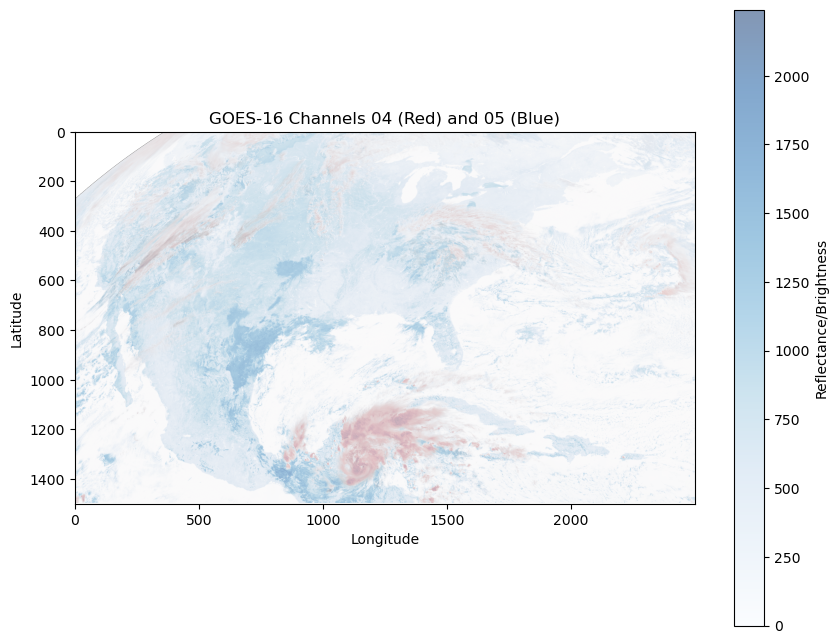

In [5]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G16['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G16['CMI_C05'].squeeze(), cmap='Blues', alpha=0.5)

plt.title('GOES-16 Channels 04 (Red) and 05 (Blue)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


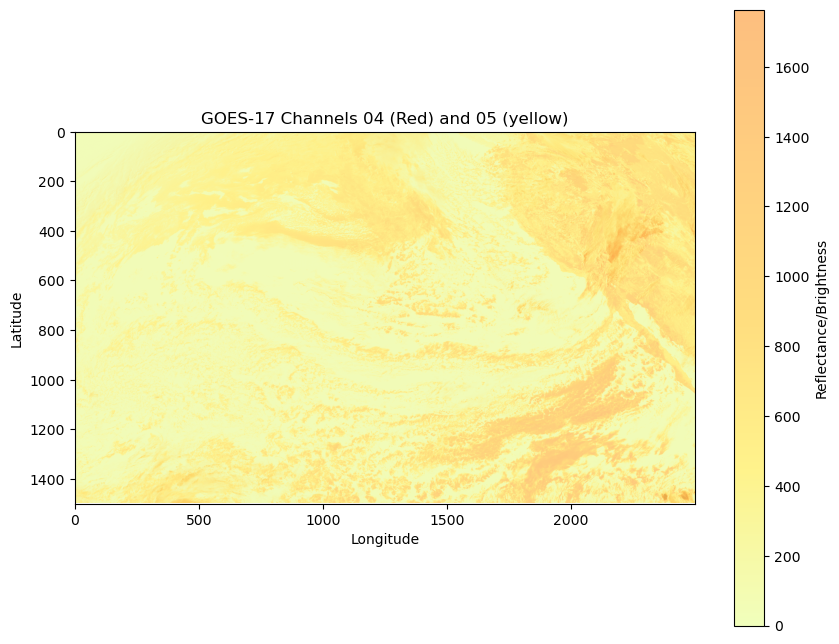

In [6]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G17['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G17['CMI_C05'].squeeze(), cmap='Wistia', alpha=0.5)

plt.title('GOES-17 Channels 04 (Red) and 05 (yellow)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


In [7]:
G17_as16 = G17.rio.reproject_match(G16)

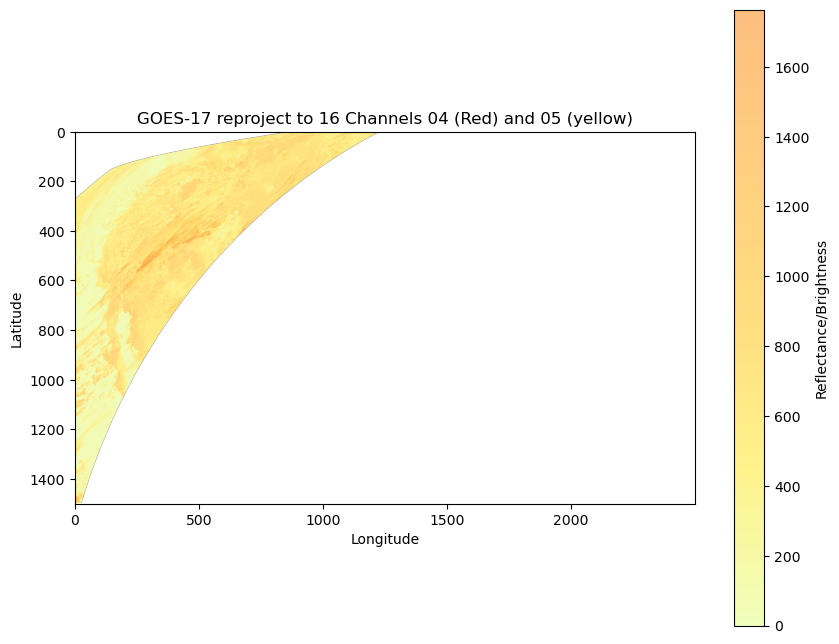

In [8]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G17_as16['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G17_as16['CMI_C05'].squeeze(), cmap='Wistia', alpha=0.5)

plt.title('GOES-17 reproject to 16 Channels 04 (Red) and 05 (yellow)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


##here start the clip

In [14]:
AOI = gpd.read_file(AOI_path)

AOI = AOI.to_crs(G17.rio.crs)
G17_clip = G17.rio.clip(AOI.geometry)

<Axes: >

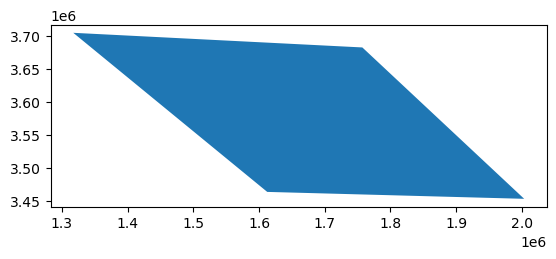

In [15]:
AOI.plot()

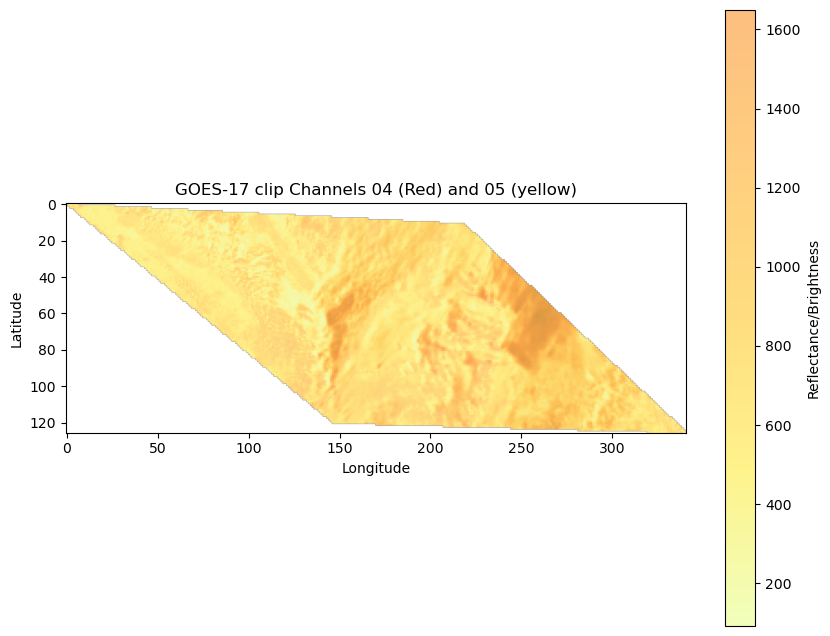

In [16]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G17_clip['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G17_clip['CMI_C05'].squeeze(), cmap='Wistia', alpha=0.5)

plt.title('GOES-17 clip Channels 04 (Red) and 05 (yellow)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


In [17]:
AOI = AOI.to_crs(G16.rio.crs)
G16_clip = G16.rio.clip(AOI.geometry)

<Axes: >

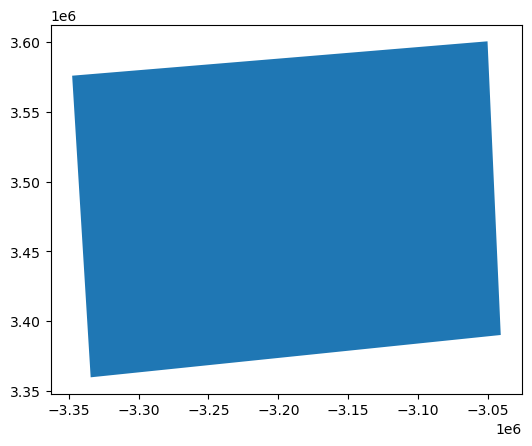

In [18]:
AOI.plot()

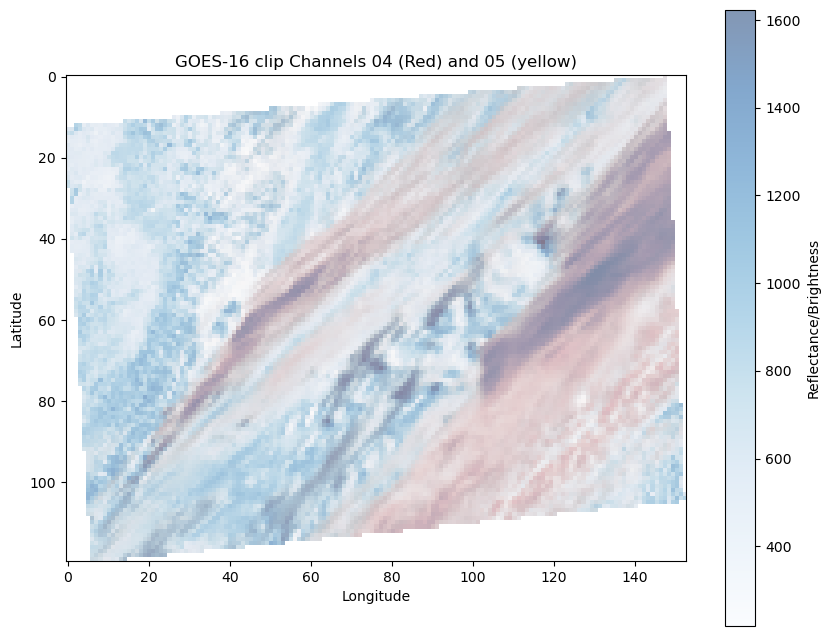

In [20]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G16_clip['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G16_clip['CMI_C05'].squeeze(), cmap='Blues', alpha=0.5)

plt.title('GOES-16 clip Channels 04 (Red) and 05 (yellow)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


In [21]:
AOI = AOI.to_crs(G16_clip.rio.crs)
G17_G16_CRS_clip = G17_as16.rio.clip(AOI.geometry)

<Axes: >

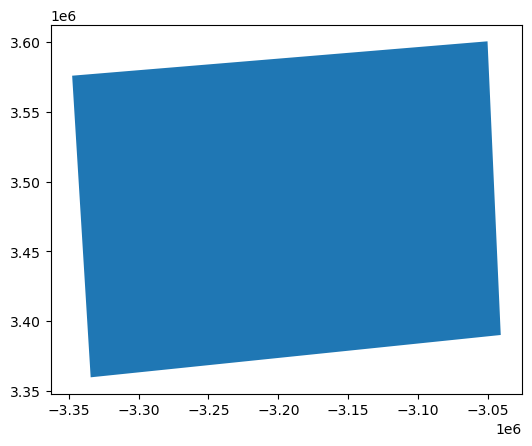

In [22]:
AOI.plot()

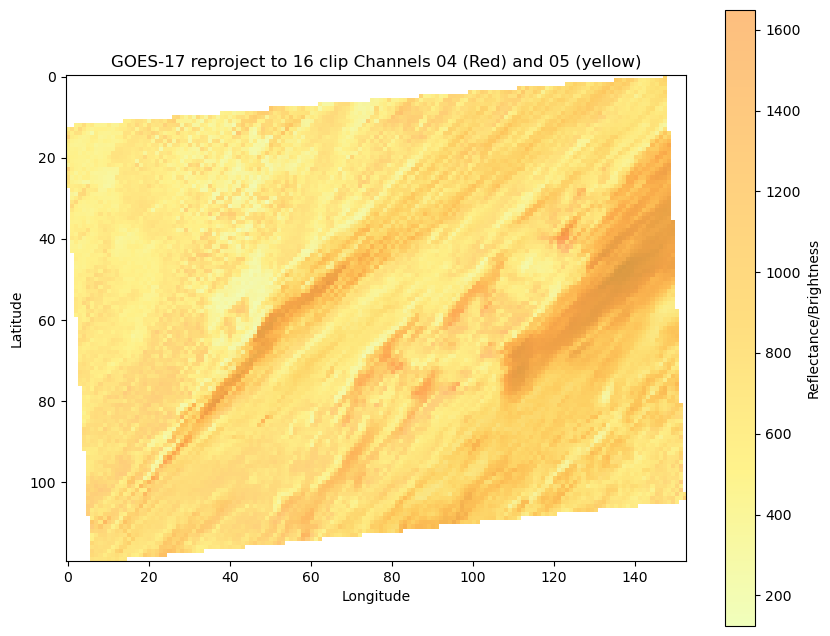

In [23]:
plt.figure(figsize=(10, 8))

# Plot Channel 4 with some transparency
plt.imshow(G17_G16_CRS_clip['CMI_C04'].squeeze(), cmap='Reds', alpha=0.5)

# Overlay Channel 5 with transparency
plt.imshow(G17_G16_CRS_clip['CMI_C05'].squeeze(), cmap='Wistia', alpha=0.5)

plt.title('GOES-17 reproject to 16 clip Channels 04 (Red) and 05 (yellow)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Reflectance/Brightness')
plt.show()


In [18]:
AOI = AOI.to_crs(G17_as16.rio.crs)
G17_G16_CRS_clip2 = G17_as16.rio.clip(AOI.geometry)

In [19]:
if G17_G16_CRS_clip is G17_G16_CRS_clip2:
    print("Same object in memory")
else:
    print("not Same object in memory")

not Same object in memory


In [20]:
print(np.array_equal(G17_G16_CRS_clip.values, G17_G16_CRS_clip2.values))

False


In [21]:
# Step 1: Load the VIRS .tif image

# Step 2: Reproject the VIRS image to match G17_G16_CRS_clip2
virs_reprojected = virs_image.rio.reproject_match(G16)

In [22]:
AOI = AOI.to_crs(virs_reprojected.rio.crs)
virs_reprojected_clip = virs_reprojected.rio.clip(AOI.geometry)

In [23]:
# Force the CRS of VIRS to match G17
virs_reprojected = virs_image.rio.write_crs(G17_G16_CRS_clip2.rio.crs, inplace=True)

# Reproject VIRS to match G17 grid and resolution
virs_reprojected = virs_image.rio.reproject_match(G17_G16_CRS_clip2)


In [24]:
AOI = AOI.to_crs(virs_reprojected.rio.crs)
virs_reprojected_clip = virs_reprojected.rio.clip(AOI.geometry)

In [25]:
# virs_reprojected_clip.rio.to_raster("virs_reprojected_clip.tif")
virs_reprojected.rio.to_raster("virs_reprojected.tif")
